#  <font color='green'>Cavit Cakir 23657 CS210 Individual Project</font>

In [1]:
import reverse_geocoder as rg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
from geopy.distance import geodesic

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join

d_path = r"/Users/cavitcakir/Desktop/cs210/proje1"
filename = "taxi-trips.csv"

df = pd.read_csv(join(d_path, filename))

#  <font color='green'>SHAPE</font>

In [2]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))


number of rows: 118185, number of columns: 11


# <font color='green'>TYPE</font>

<font color='red'>I only changed the pickup_datetime column's type to decide time_of_day</font>

In [3]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#  <font color='green'>DESCRIBE</font>

In [4]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


#   <font color='green'>Inserting pickup_dist </font>

In [5]:
x = df["pickup_latitude"]
y = df["pickup_longitude"]
c1 = list(zip(x,y))

results = rg.search(c1) # default mode = 2
nameList=[]
for x in range(len(results)):
    nameList.append(results[x]['name'])
    
df.insert(5,"pickup_dist",nameList)


Loading formatted geocoded file...


# <font color='green'> Inserting dropoff_dist </font>

In [6]:
x = df["dropoff_latitude"]
y = df["dropoff_longitude"]
c2 = list(zip(x,y))

results = rg.search(c2) # default mode = 2
nameList=[]
for x in range(len(results)):
    nameList.append(results[x]['name'])
    
df.insert(8,"dropoff_dist",nameList)

# <font color='green'> TOP 5 pickup_dist </font>

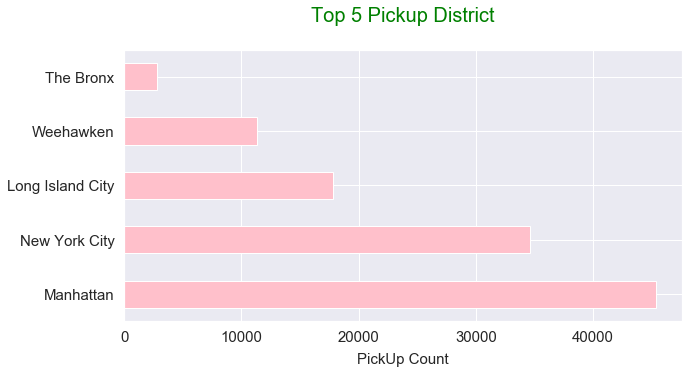

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_dist, dtype: int64


In [7]:
do = df['pickup_dist'].value_counts()[0:5]

y_pos = np.arange(len(do))
do.plot(kind="barh",fontsize=15,figsize=(10,5),color="pink")
plt.title("Top 5 Pickup District",fontsize = 20 , color="green",y=1.08)
plt.xlabel("PickUp Count",fontsize=15,labelpad=8)
plt.grid(True)

plt.show()
print(do)

# <font color='green'> TOP 5 dropoff_dist  </font>

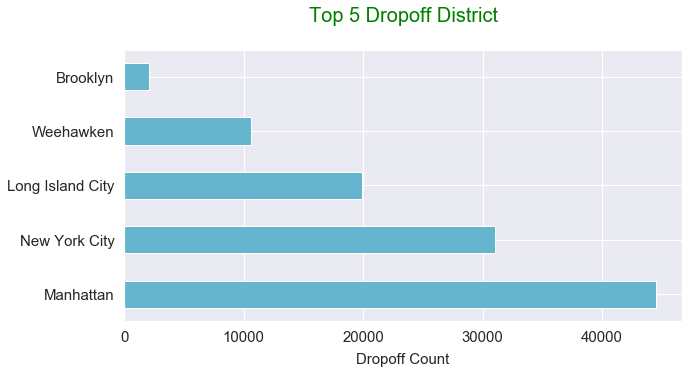

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_dist, dtype: int64


In [8]:
do2 = df['dropoff_dist'].value_counts()[0:5]

y_pos = np.arange(len(do2))
do2.plot(kind="barh",fontsize=15,figsize=(10,5),color="c")
plt.title("Top 5 Dropoff District",fontsize = 20 , color="green",y=1.08)
plt.xlabel("Dropoff Count",fontsize=15,labelpad=8)
plt.grid(True)

plt.show()
print(do2)

# <font color='green'> TOP 5 Pair District  </font>

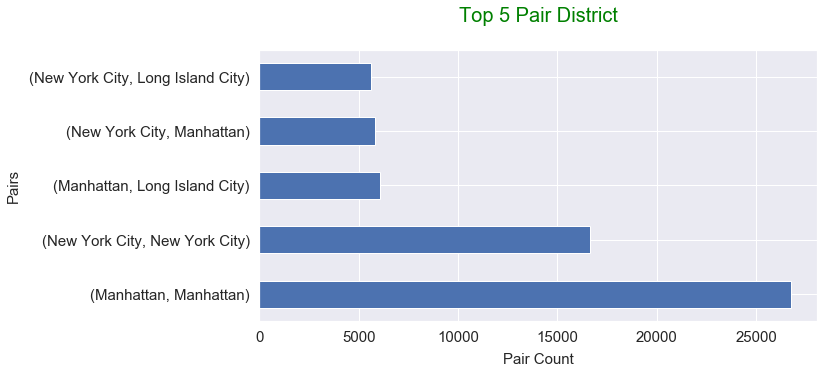

pickup_dist    dropoff_dist    
Manhattan      Manhattan           26746
New York City  New York City       16660
Manhattan      Long Island City     6070
New York City  Manhattan            5802
               Long Island City     5633
dtype: int64


In [9]:
do3 = df.groupby(['pickup_dist','dropoff_dist']).size().sort_values(ascending = False)[0:5]

y_pos = np.arange(len(do3))
do3.plot(kind="barh",fontsize=15,figsize=(10,5),color="b")
plt.title("Top 5 Pair District",fontsize = 20 , color="green",y=1.08)
plt.ylabel("Pairs",fontsize=15,labelpad=8)
plt.xlabel("Pair Count",fontsize=15,labelpad=8)
plt.grid(True)

plt.show()
print(do3)


# <font color='green'> Inserting Distance </font>
 

In [10]:
measure = []
for x in range(len(c1)):
    start = c1[x]
    end = c2[x]
    measure.append(geodesic(start,end).miles)
    
df.insert(5,"distance",measure)

# <font color='green'> Head</font>

In [11]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,distance,pickup_dist,pickup_longitude,pickup_latitude,dropoff_dist,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,0.933406,Manhattan,-73.982155,40.767937,Manhattan,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,3.178194,Long Island City,-73.981049,40.744339,Manhattan,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,0.928961,Weehawken,-73.994560,40.750526,Manhattan,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,1.228003,Manhattan,-73.975090,40.758766,Long Island City,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,1.562103,New York City,-73.994484,40.745087,New York City,-73.998993,40.722710,N,695


# <font color='green'> Inserting time_of_day Categories</font>

In [12]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
timeCategories = []
dtime = df[df.columns[2]]

seven_am = datetime(2000, 1, 1, 7, 0, 0)
nine_am = datetime(2000, 1, 1, 9, 0, 0)
four_pm = datetime(2000, 1, 1, 16, 0, 0)
six_pm = datetime(2000, 1, 1, 18, 0, 0)
eleven_pm = datetime(2000, 1, 1, 23, 0, 0)

for x in range(len(dtime)):
    if(nine_am.time() > dtime[x].time() >= seven_am.time()):
        timeCategories.append("rush hour morning")
    elif(four_pm.time() > dtime[x].time() >= nine_am.time()):
        timeCategories.append("afternoon")
    elif(six_pm.time() > dtime[x].time() >= four_pm.time()):
        timeCategories.append("rush hour evening")
    elif(eleven_pm.time() > dtime[x].time() >= six_pm.time()):
        timeCategories.append("evening")
    else:
        timeCategories.append("latenight")

df.insert(2,"time_of_day",timeCategories)     




# <font color='green'> Calculating Average Distance for all categories </font>

('rush_hour_morning', 1.9438227679611488)
('afternoon', 1.9324556263877675)
('rush_hour_evening', 2.0771284877356306)
('evening', 2.0990763932796592)
('latenight', 2.55857968115662)


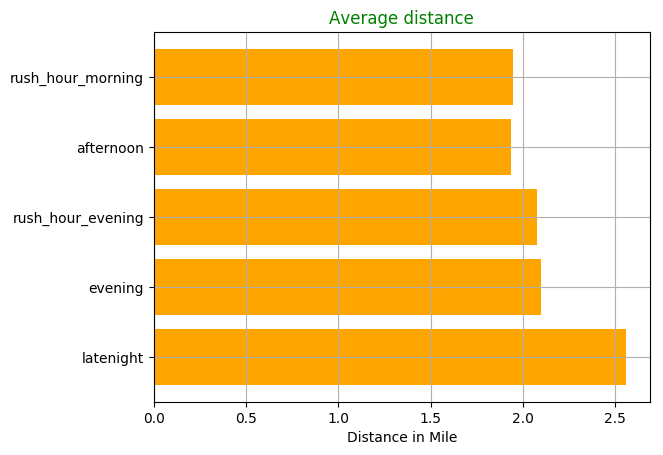

In [13]:
rush_hour_morning = 0
afternoon = 0
rush_hour_evening = 0
evening = 0
latenight = 0
rush_hour_morningC = 0
afternoonC = 0
rush_hour_eveningC = 0
eveningC = 0
latenightC = 0

for x in range(len(timeCategories)):
    if(timeCategories[x] == "rush hour morning"):
        rush_hour_morning += measure[x]
        rush_hour_morningC += 1
        
    elif(timeCategories[x] == "afternoon"):
        afternoon += measure[x]
        afternoonC += 1
        
    elif(timeCategories[x] == "rush hour evening"):
        rush_hour_evening += measure[x]
        rush_hour_eveningC += 1
        
    elif(timeCategories[x] == "evening"):
        evening += measure[x]
        eveningC += 1
        
    else:
        latenight += measure[x]
        latenightC += 1



do4 = [("rush_hour_morning",rush_hour_morning/rush_hour_morningC) , ("afternoon",afternoon / afternoonC),("rush_hour_evening" ,rush_hour_evening / rush_hour_eveningC),
       ("evening", evening / eveningC), ("latenight", latenight / latenightC)]
for i in do4:
    print(i)

plt.rcdefaults()
fig, ax = plt.subplots()

y_val = [x[0] for x in do4]
x_val = [x[1] for x in do4]

y_pos = np.arange(len(y_val))
ax.barh(y_pos, x_val, align='center',
        color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_val)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Distance in Mile')
ax.set_title('Average distance', color="green")

plt.grid(True)

plt.show()



# <font color='green'> Calculating Average Duration for all categories </font>

('rush_hour_morning', 918.4887158766138)
('afternoon', 963.9227460253572)
('rush_hour_evening', 1024.4945520581114)
('evening', 893.5953287492187)
('latenight', 866.0954570791528)


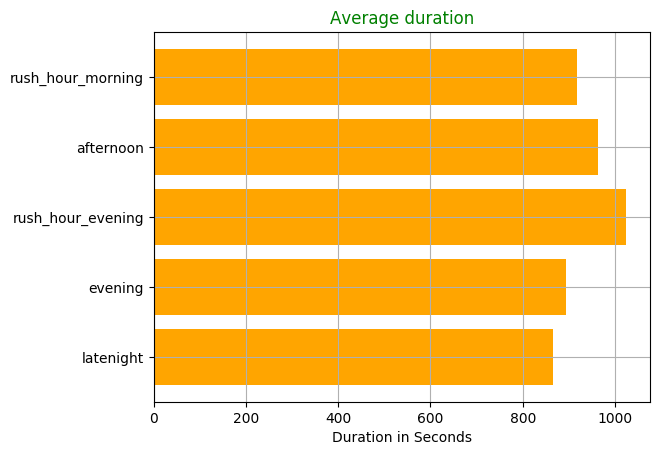

In [14]:
duration = df[df.columns[14]]



rush_hour_morning = 0
afternoon = 0
rush_hour_evening = 0
evening = 0
latenight = 0
rush_hour_morningC = 0
afternoonC = 0
rush_hour_eveningC = 0
eveningC = 0
latenightC = 0

for x in range(len(timeCategories)):
    if(timeCategories[x] == "rush hour morning"):
        rush_hour_morning += duration[x]
        rush_hour_morningC += 1
        
    elif(timeCategories[x] == "afternoon"):
        afternoon += duration[x]
        afternoonC += 1
        
    elif(timeCategories[x] == "rush hour evening"):
        rush_hour_evening += duration[x]
        rush_hour_eveningC += 1
        
    elif(timeCategories[x] == "evening"):
        evening += duration[x]
        eveningC += 1
        
    else:
        latenight += duration[x]
        latenightC += 1

do4 = [("rush_hour_morning",rush_hour_morning/rush_hour_morningC) , ("afternoon",afternoon / afternoonC),("rush_hour_evening" ,rush_hour_evening / rush_hour_eveningC),
       ("evening", evening / eveningC), ("latenight", latenight / latenightC)]

for i in do4:
    print(i)

plt.rcdefaults()
fig, ax = plt.subplots()

y_val = [x[0] for x in do4]
x_val = [x[1] for x in do4]

y_pos = np.arange(len(y_val))
ax.barh(y_pos, x_val, align='center',
        color='orange', ecolor='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_val)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Duration in Seconds')
ax.set_title('Average duration', color = 'green')
plt.grid(True)

plt.show()



# <font color='green'> Head </font>

In [15]:
df.head()

,id,vendor_id,time_of_day,pickup_datetime,dropoff_datetime,passenger_count,distance,pickup_dist,pickup_longitude,pickup_latitude,dropoff_dist,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,rush hour evening,2016-03-14 17:24:55,2016-03-14 17:32:30,1,0.933406,Manhattan,-73.982155,40.767937,Manhattan,-73.964630,40.765602,N,455
1,id0012891,2,evening,2016-03-10 21:45:01,2016-03-10 22:05:26,1,3.178194,Long Island City,-73.981049,40.744339,Manhattan,-73.973000,40.789989,N,1225
2,id3361153,1,rush hour morning,2016-03-11 07:11:23,2016-03-11 07:20:09,1,0.928961,Weehawken,-73.994560,40.750526,Manhattan,-73.978500,40.756191,N,526
3,id2129090,1,afternoon,2016-03-14 14:05:39,2016-03-14 14:28:05,1,1.228003,Manhattan,-73.975090,40.758766,Long Island City,-73.953201,40.765068,N,1346
4,id0256505,1,afternoon,2016-03-14 15:04:38,2016-03-14 15:16:13,1,1.562103,New York City,-73.994484,40.745087,New York City,-73.998993,40.722710,N,695


# <font color='green'> This graph shows how distance differs as passanger_count changes </font>

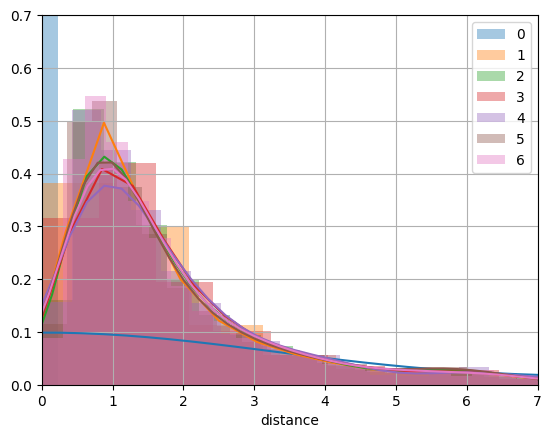

In [16]:
plt.ylim(0,0.7)
plt.xlim(0,7)

for i in range(7):
    sns.distplot(df[df['passenger_count'] == i]['distance'],label = str(i))
plt.legend()
plt.grid(True)

# <font color='green'> Plotting only 1 and more than 1 passenger </font>

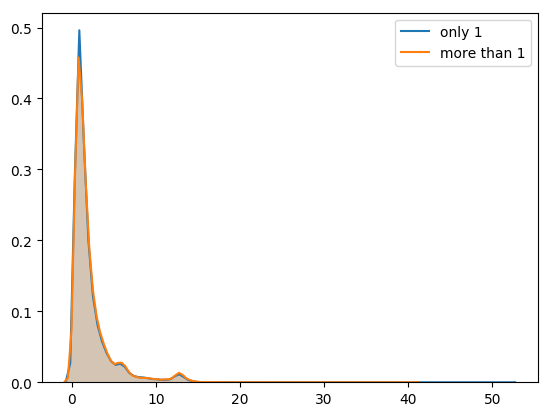

In [17]:
past_df = df[(df["passenger_count"] == 1)]
gs_df = df[df["passenger_count"] != 1]

ax = sns.kdeplot(past_df["distance"].rename("only 1"), shade=True)
sns.kdeplot(gs_df["distance"].rename("more than 1"), ax=ax, shade=True)

#plt.ylim(0.41,0.5)
#plt.xlim(0,5)

plt.show()

In [18]:
past_values = past_df["distance"].values
gs_era = gs_df["distance"].values

In [19]:
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False)
p_value

9.555133481554851e-07

# My Null Hypothesis was "passenger group size has no effect on the distance."
## I compared distance between only one people and more than one people rides
## I calculated p value as 9.555133481554851e-07 which is $ 9.55*10^-07 $
## This value is less than %5 which means my null hypothesis is declined
## So passenger group size have effect on distance

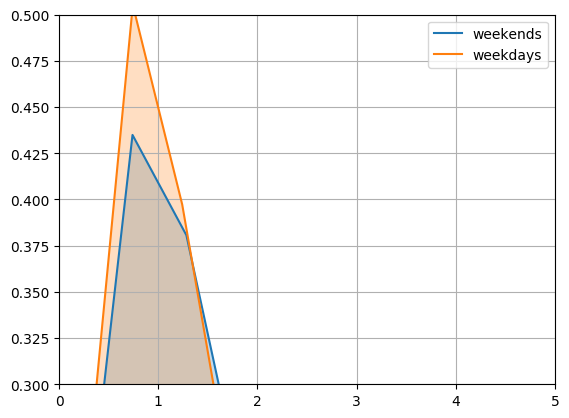

In [20]:
past_df = df[(df["pickup_datetime"].dt.dayofweek == 5) | (df["pickup_datetime"].dt.dayofweek == 6 )]
gs_df = df[(df["pickup_datetime"].dt.dayofweek != 5) & (df["pickup_datetime"].dt.dayofweek != 6 )]

ax = sns.kdeplot(past_df["distance"].rename("weekends"), shade=True)
sns.kdeplot(gs_df["distance"].rename("weekdays"), ax=ax, shade=True)

plt.grid(True)
plt.ylim(0.3,0.5)
plt.xlim(0,5)

plt.show()

In [21]:
past_values = past_df["distance"].values
gs_era = gs_df["distance"].values

# My Null Hypothesis was "The day of the week has no effect on the distance."
## I compared distance between weekdays and weekends
## I calculated p value as 2.0924144330695257e-08 which is $2.09*10^-8$ 
## This value is less than %5 which means my null hypothesis is declined
## So distance changes as weekend comes.

In [22]:
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False)
p_value

2.0924144330695257e-08